In [21]:
from keras.datasets import mnist
import matplotlib.pyplot as plt  
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [22]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


The label value is  0


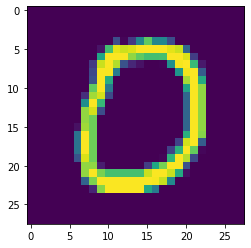

In [23]:
print("The label value is ",y_test[10]) #Value in y_test 
plt.imshow(X_test[10])

The label value is  6


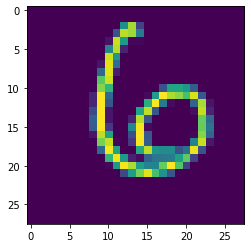

In [24]:
print("The label value is ",y_test[100]) #Value in y_test 
plt.imshow(X_test[100])

The label value is  4


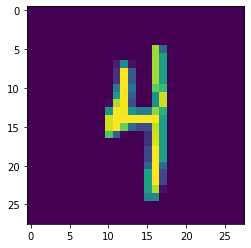

In [25]:
print("The label value is ",y_test[65]) #Value in y_test 
plt.imshow(X_test[65])

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
X_train1 = X_train.reshape(60000, 28, 28, 1).astype('float32')

X_test1 = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [29]:
number_of_classes= 10
y_train1 = np_utils.to_categorical(y_train,number_of_classes)
y_test1 = np_utils.to_categorical(y_test,number_of_classes)

In [30]:
print("After encoding the value",y_test[10] ,"become", y_test1[10])

After encoding the value 0 become [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
print("After encoding the value",y_test[100] ,"become", y_test1[100])

After encoding the value 6 become [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [32]:
print("After encoding the value",y_test[65] ,"become", y_test1[65])

After encoding the value 4 become [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [15]:
model.fit(X_train1, y_train1, batch_size=32, epochs=10, validation_data=(X_test1,y_test1))

Epoch 1/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1908 - accuracy: 0.9520 - val_loss: 0.0722 - val_accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0639 - accuracy: 0.9806 - val_loss: 0.0792 - val_accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0811 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0864 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.1096 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.1166 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.1276 -

In [34]:
metrics = model.evaluate(X_test1, y_test1, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.17650121450424194, 0.9794999957084656]


In [35]:
prediction = model.predict(X_test1[:4])
print(prediction)

[[1.5173043e-22 8.4258035e-36 3.3258008e-21 4.2932641e-21 5.6306000e-34
  5.6176962e-30 5.3118001e-35 1.0000000e+00 1.8811709e-20 1.8820960e-21]
 [5.7324457e-17 2.1319228e-27 1.0000000e+00 5.4940412e-20 1.2439752e-36
  2.8165258e-36 1.2113163e-15 0.0000000e+00 6.4437084e-18 5.2187769e-31]
 [1.4451886e-16 1.0000000e+00 5.9390881e-14 2.8238276e-23 2.2156307e-13
  6.8053675e-18 6.2765272e-11 6.5911502e-13 2.2929852e-12 7.0158600e-23]
 [1.0000000e+00 2.5717390e-33 4.9722789e-22 1.3101355e-29 1.4516712e-29
  5.5137968e-28 1.5292815e-13 4.9220298e-27 5.8773619e-20 8.2154105e-20]]


In [36]:
import numpy as np
print(np.argmax(prediction, axis=1))
print(y_test1[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [33]:
model.save("model.h5")

In [33]:
from tensorflow.keras.models import load_model
model=load_model("model.h5")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


Prediction (Softmax) from the neural network:

 [[1.0000000e+00 3.5041303e-34 3.1392596e-20 1.9669141e-34 0.0000000e+00
  1.2160965e-34 2.6726674e-17 7.1123406e-35 3.0426787e-25 8.0960580e-30]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




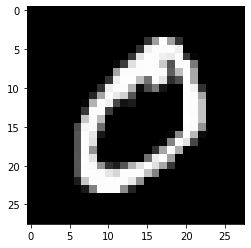



Final Output: 0


In [37]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))